In [524]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [525]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [526]:
df = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [527]:
df.shape

(5110, 12)

In [528]:
df.head()  # have a glance at the top 5 datasets

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [529]:
df.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [530]:
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [531]:
df.nunique() # we can check how many catregories in each column.

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [532]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [533]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [534]:
df['gender'].value_counts()


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [535]:
df['stroke'].value_counts() # here we can clearly see its an imbalance datasets.

0    4861
1     249
Name: stroke, dtype: int64

In [536]:
df.info(null_counts=True) # prints the consice summary of the column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


So , here we can clearly konow that bmi is having null value.

In [537]:
print(df.isnull().sum())  #bmi contains 201 null values.
print(df.shape)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
(5110, 12)


Text(0, 0.5, 'Frequency')

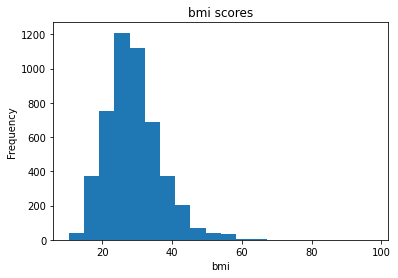

In [538]:
%matplotlib inline     
fig, ax = plt.subplots()
ax.hist(df['bmi'],bins=20)
ax.set_title('bmi scores')
ax.set_xlabel('bmi')
ax.set_ylabel('Frequency')


In [539]:
# since BMI is almost normally distributed so filling the null values with the mean of the column.

df.bmi=df.bmi.fillna(df.bmi.mean())
df.bmi

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

In [540]:
print(df.isnull().sum())  # No null values or null values replaced with mean
print(df.shape)

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
(5110, 12)


In [541]:
print(df.duplicated().sum())  # checking for duplicates if any
print(df.shape)

0
(5110, 12)


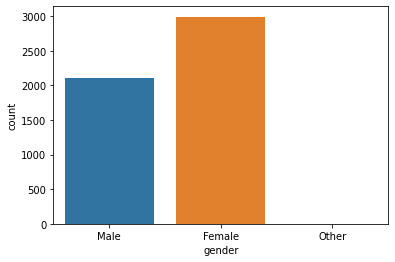

In [542]:
# EDA
sns.countplot(x='gender',data=df) # we can clearly see female population is greater 
plt.show()                        # than male. 

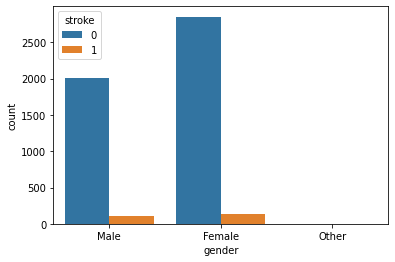

In [543]:
sns.countplot(x='gender',hue='stroke',data=df) # female are more tends to stroke than
plt.show()                                     # Male. 


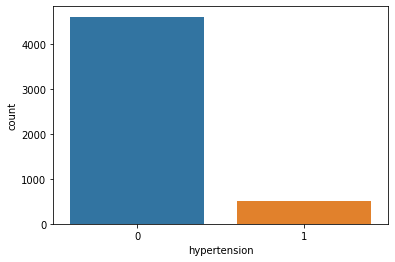

In [544]:
sns.countplot(x='hypertension',data=df)
plt.show()    # maximum people are not having hypertension

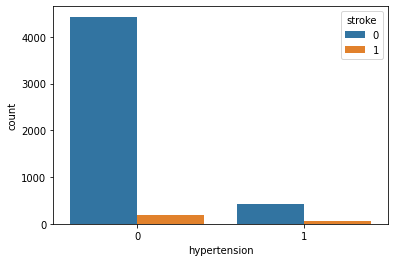

In [545]:
sns.countplot(x='hypertension',hue='stroke',data=df)
plt.show() # Person not having hypertension is more tends to stroke than having hypertension 

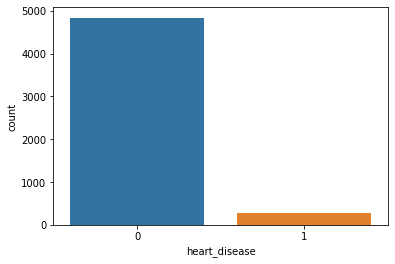

In [546]:
sns.countplot(x='heart_disease',data=df)
plt.show() # Very little population is having heart disease

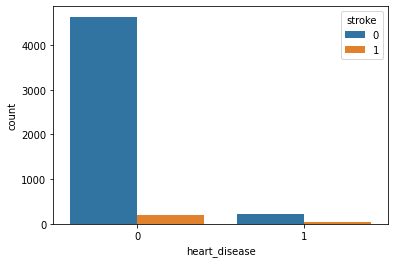

In [547]:
sns.countplot(x='heart_disease',hue='stroke',data=df)
plt.show() # Not having heart disease can be more into stroke

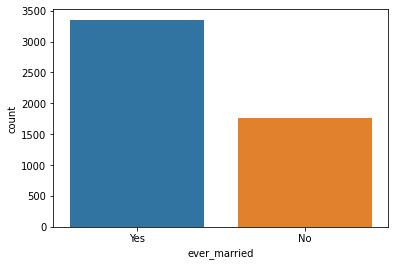

In [548]:
sns.countplot(x='ever_married',data=df)
plt.show() # Married population is much more than Unmarried.

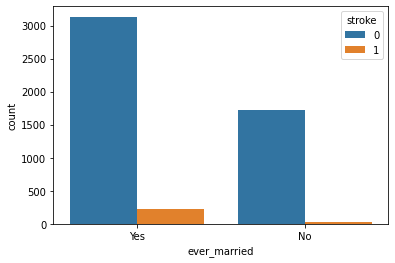

In [549]:
sns.countplot(x='ever_married',hue='stroke',data=df)
plt.show() # Married person is mainly affected by stroke than unmarried.

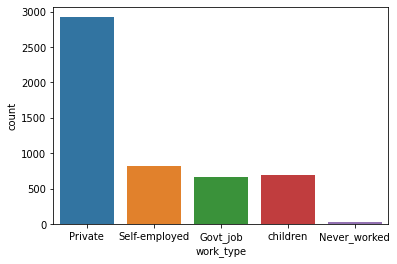

In [550]:
sns.countplot(x='work_type',data=df)
plt.show() # Maximum no. of population is in private job.

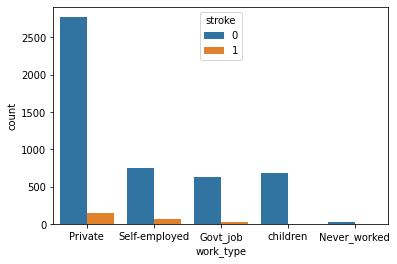

In [551]:
sns.countplot(x='work_type',hue='stroke',data=df)
plt.show() # mostly private employees are getting stroke.

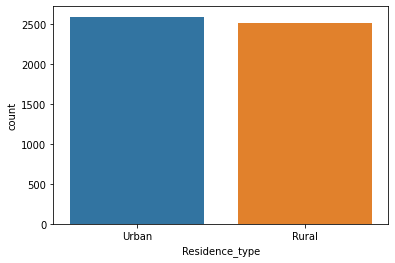

In [552]:
sns.countplot(x='Residence_type',data=df)
plt.show() # there is not much difference between Urban & Rural

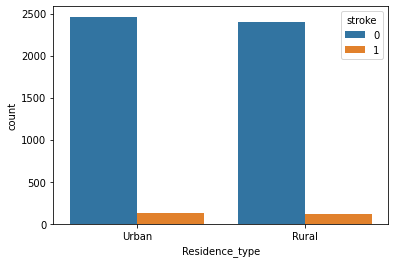

In [553]:
sns.countplot(x='Residence_type',hue='stroke',data=df)
plt.show() # there is no difference between Urban & Rural Population.

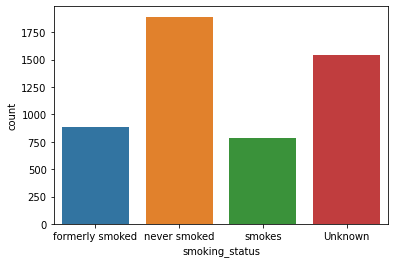

In [554]:
sns.countplot(x='smoking_status',data=df)
plt.show()

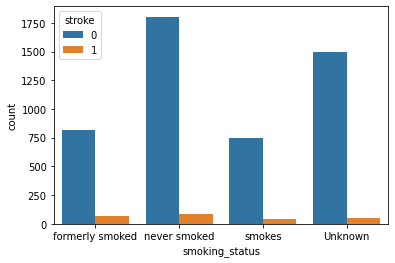

In [555]:
sns.countplot(x='smoking_status',hue='stroke',data=df)
plt.show()  #Maximum no. of the population is having a stroke are those who never smoked.

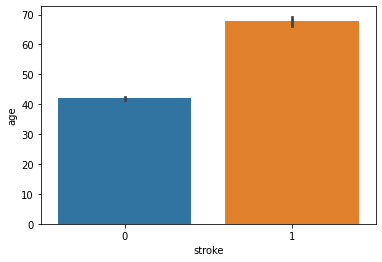

In [556]:
# So here we can clearly see maximum no. of stroke after 40.
sns.barplot(x='stroke',y='age',data=df)
plt.show()

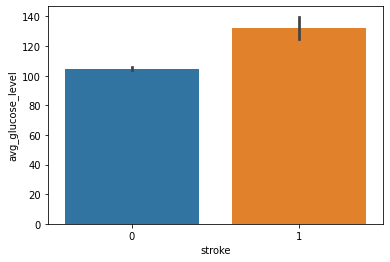

In [557]:

sns.barplot(x='stroke',y='avg_glucose_level',data=df)
plt.show()

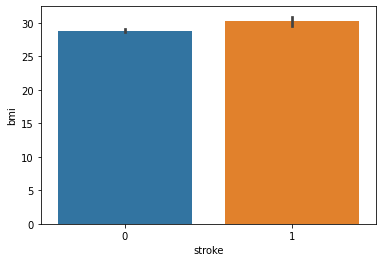

In [558]:
sns.barplot(x='stroke',y='bmi',data=df)
plt.show() # there is no difference in BMI those having stroke or not.

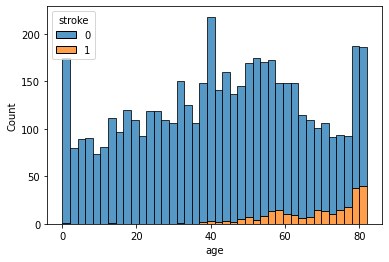

In [559]:
sns.histplot(x='age', hue='stroke',multiple='stack',bins=40,data=df)
plt.show()  # here we can clearly see after age 40 maximum no. of stroke

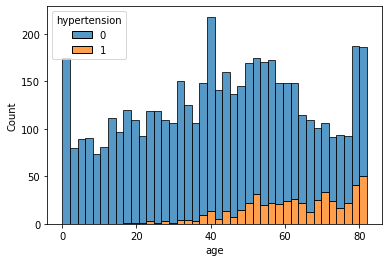

In [560]:
sns.histplot(x='age', hue='hypertension',multiple='stack',bins=40,data=df)
plt.show() # mostly after age 40 having hypertension is rising 

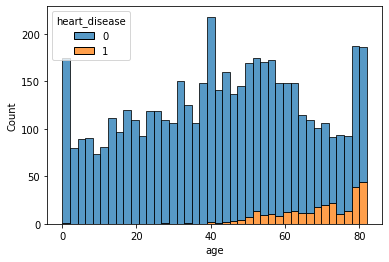

In [561]:
sns.histplot(x='age', hue='heart_disease',multiple='stack',bins=40,data=df)
plt.show()   # after 40 mainly having heart disease.

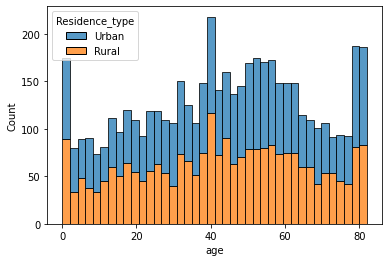

In [562]:
sns.histplot(x='age', hue='Residence_type',multiple='stack',bins=40,data=df)
plt.show() # there is not much difference in rural & urban population on the basis
           # of Age group. 

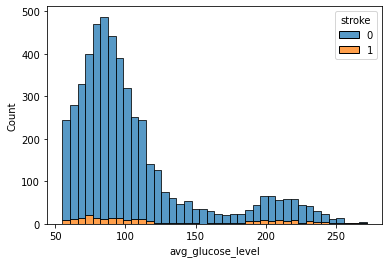

In [563]:
sns.histplot(x='avg_glucose_level', hue='stroke',multiple='stack',bins=40,data=df)
plt.show()  # mainly from 50 to 150 & 170 to 220 avg_glucose_level are having strokes

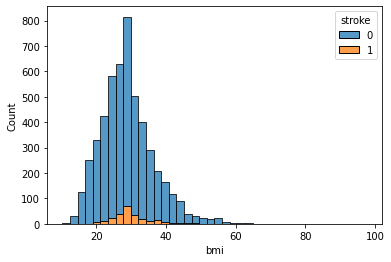

In [564]:
sns.histplot(x='bmi', hue='stroke',multiple='stack',bins=40,data=df)
plt.show() # Bmi in between 20-40 mainly having stroke.

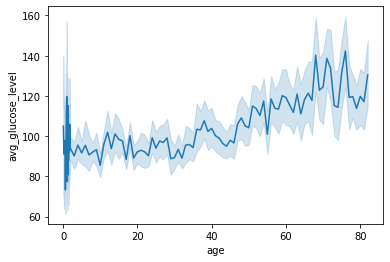

In [565]:
sns.lineplot(x='age',y='avg_glucose_level',data=df)
plt.show() # So here we can know that with age average_glucose_level also increases.

In [566]:
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1


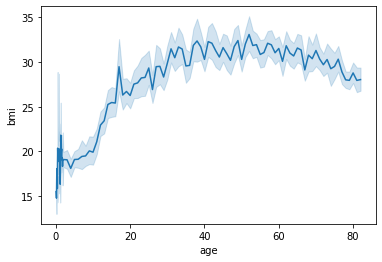

In [567]:
sns.lineplot(x='age',y='bmi',data=df)
plt.show() # first BMI increases with age then almost after 50 it starts to reduces.

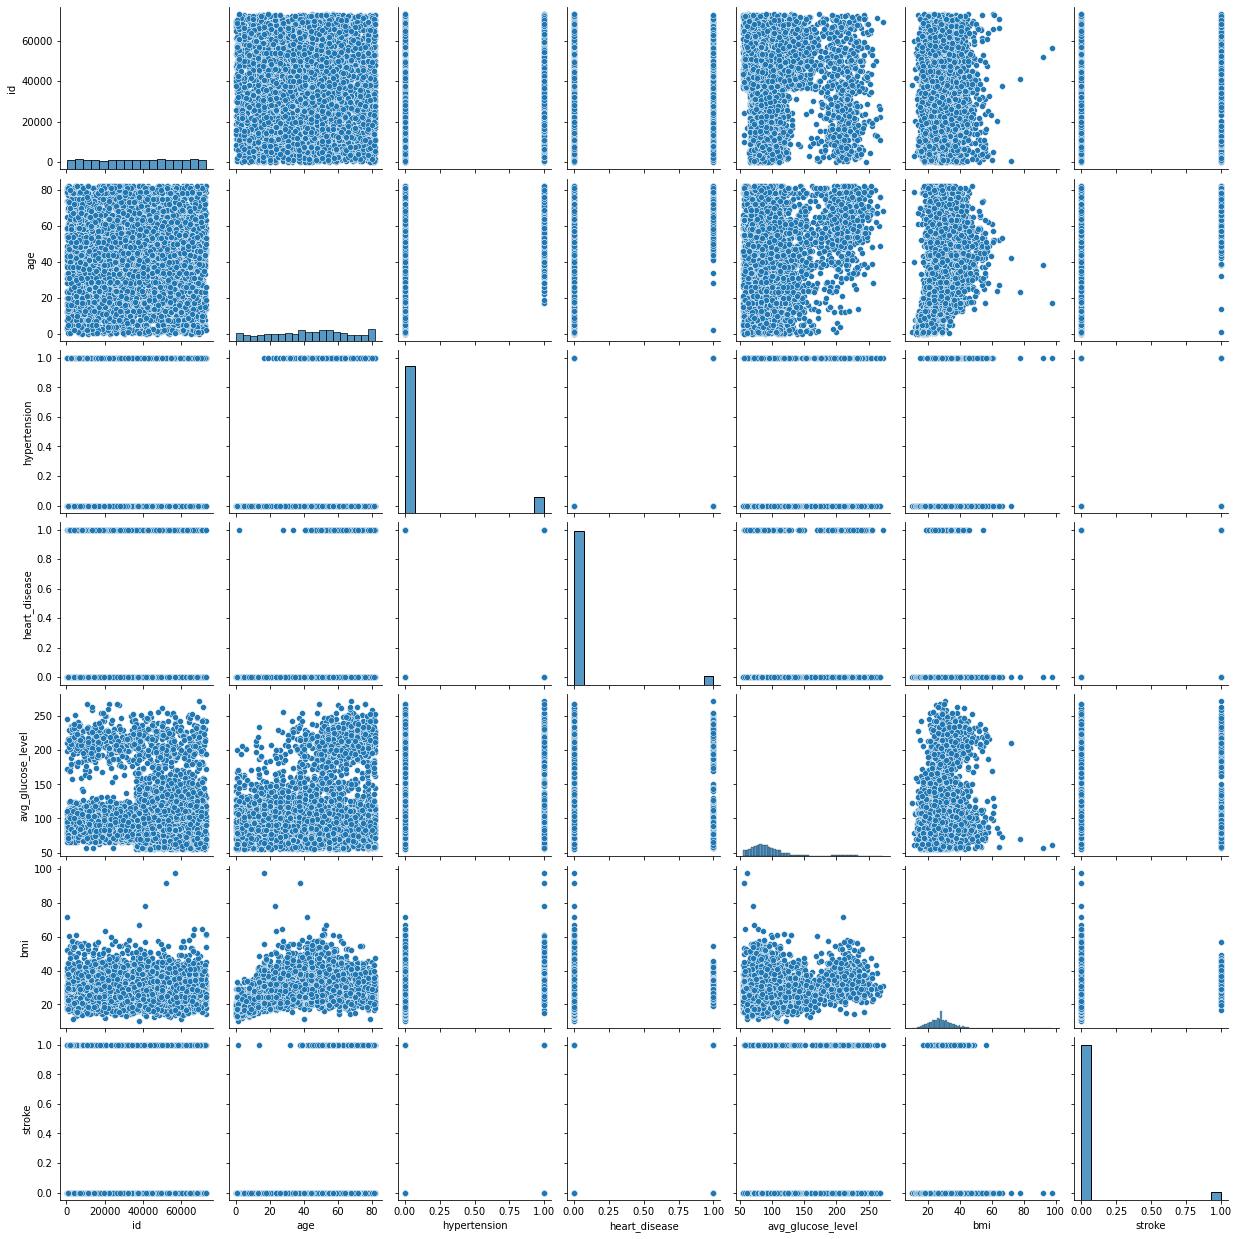

In [568]:
sns.pairplot(data=df)

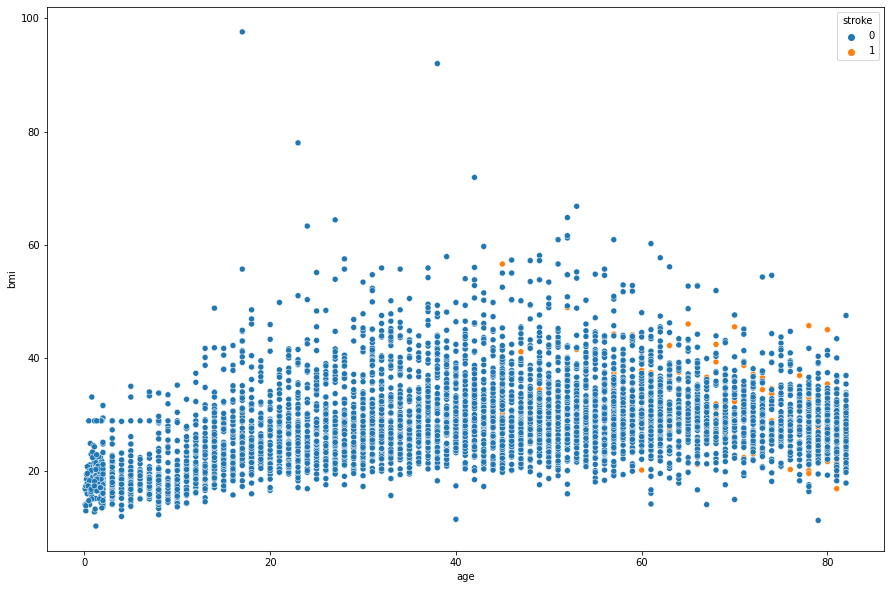

In [569]:
#                           after age 40 maximum no. of people having stroke.
plt.figure(figsize=(15,10))
sns.scatterplot(x='age',y='bmi',hue='stroke',data=df)
plt.show()

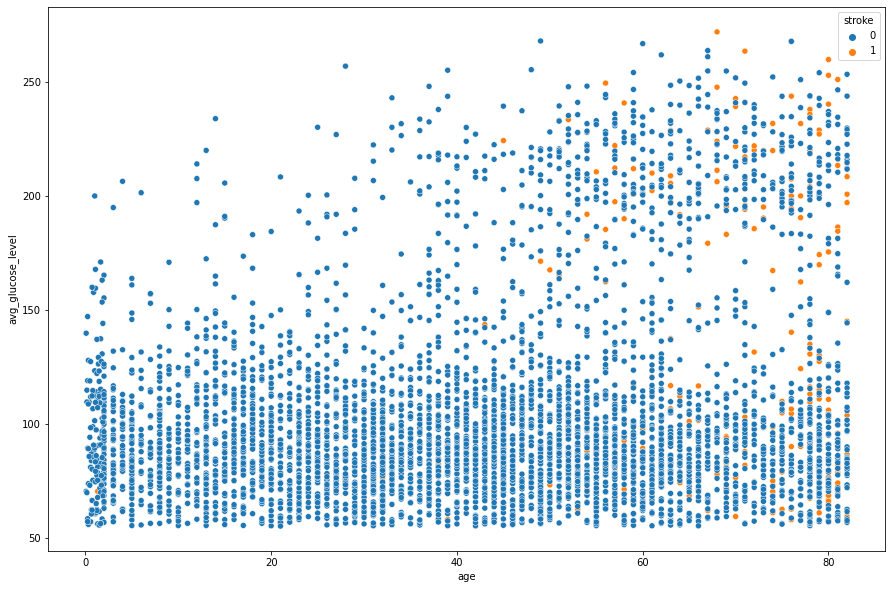

In [570]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='age',y='avg_glucose_level',hue='stroke',data=df)
plt.show()

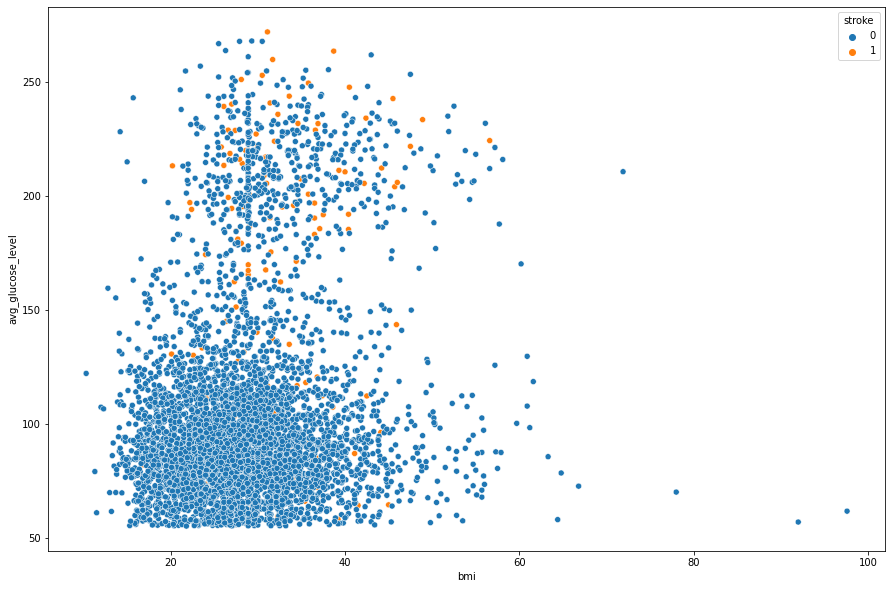

In [571]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='bmi',y='avg_glucose_level',hue='stroke',data=df)
plt.show()

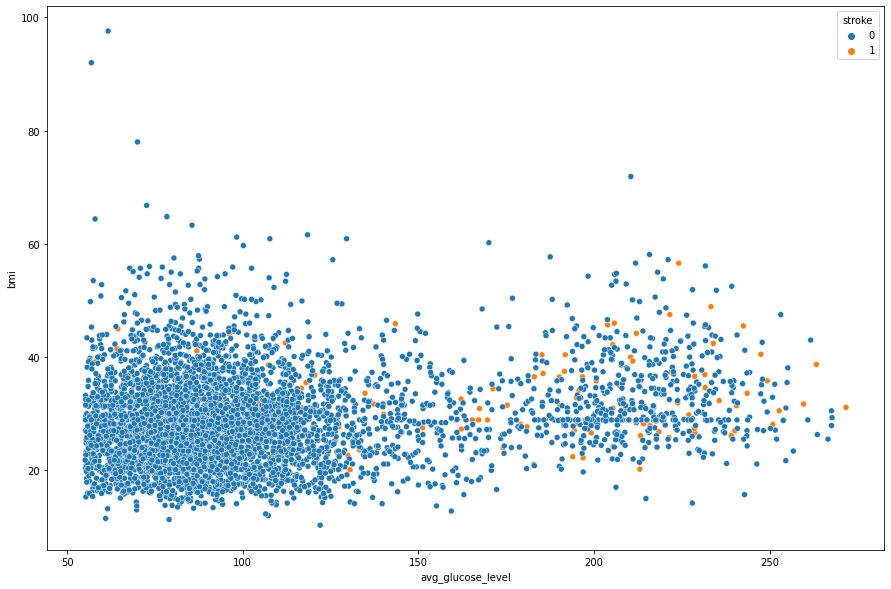

In [572]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='avg_glucose_level',y='bmi',hue='stroke',data=df)
plt.show()

In [573]:
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1


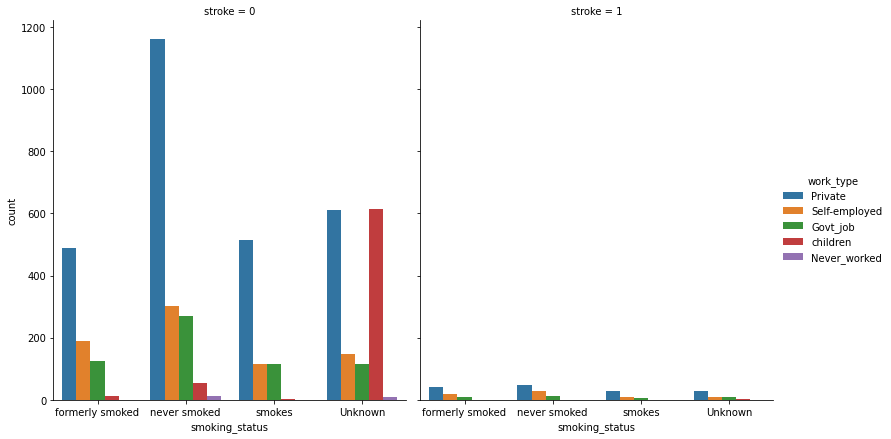

In [574]:
sns.catplot(x='smoking_status',hue='work_type',col='stroke',
           data=df, kind='count',
           height=6,aspect=.9)   # Catplot smlifies plotting that involves categorical
plt.show()                       # Variables.

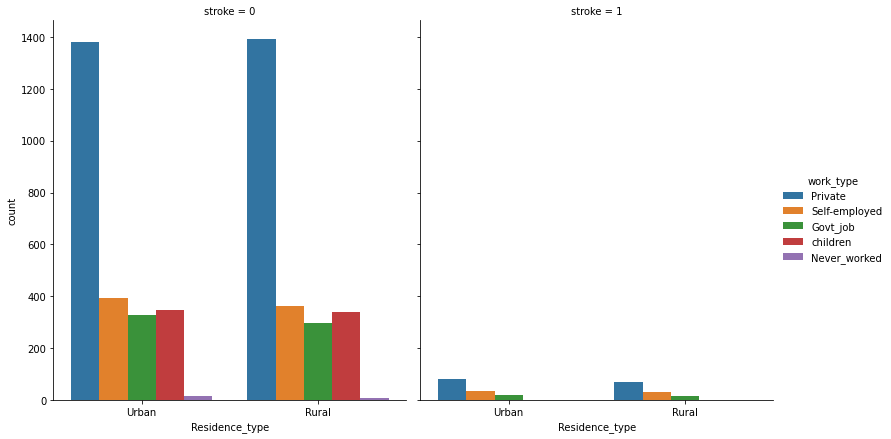

In [575]:
sns.catplot(x='Residence_type',hue='work_type',col='stroke',
           data=df, kind='count',
           height=6,aspect=.9)
plt.show()

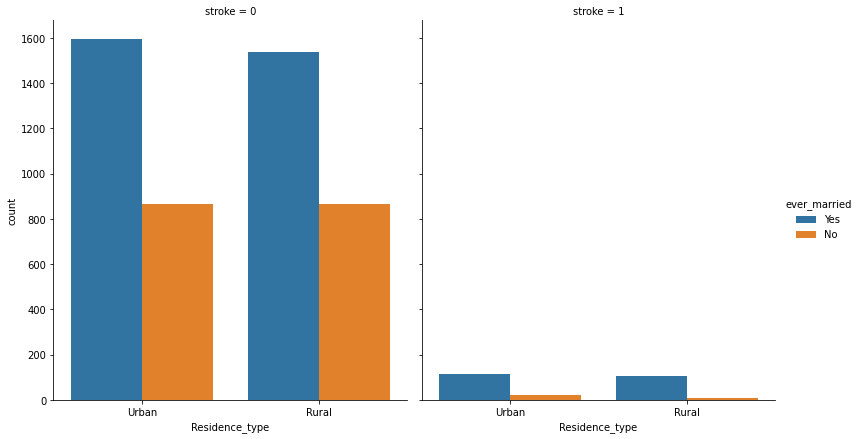

In [576]:
sns.catplot(x='Residence_type',hue='ever_married',col='stroke',
           data=df, kind='count',
           height=6,aspect=.9)
plt.show()

In [577]:
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1


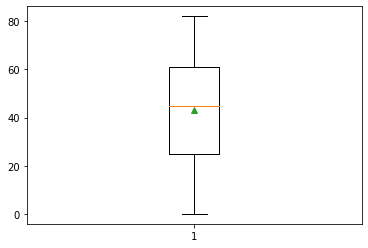

<Figure size 1080x360 with 0 Axes>

In [578]:
# Looking for Outliers
plt.boxplot(df['age'],showmeans=True)
plt.figure(figsize=(15,5))
plt.show()
            

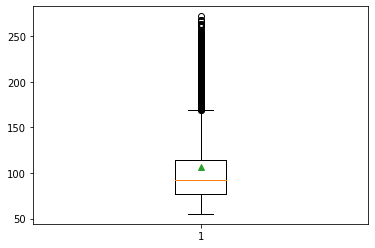

<Figure size 1080x360 with 0 Axes>

In [579]:
plt.boxplot(df['avg_glucose_level'],showmeans=True)
plt.figure(figsize=(15,5))
plt.show()
            

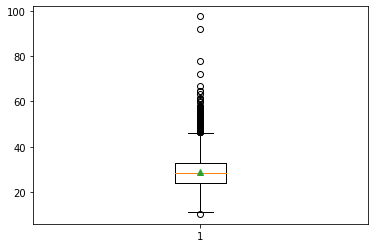

<Figure size 1080x360 with 0 Axes>

In [580]:
plt.boxplot(df['bmi'],showmeans=True)
plt.figure(figsize=(15,5))
plt.show()
            

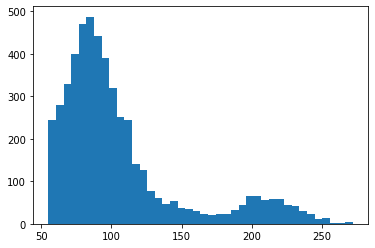

In [581]:
plt.hist(df['avg_glucose_level'],bins=40)
plt.show()

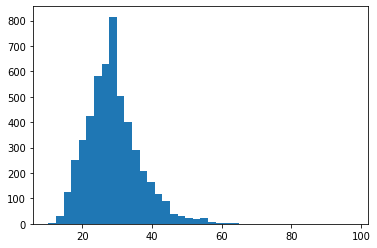

In [582]:
plt.hist(df['bmi'],bins=40)
plt.show()

In [583]:
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)



36.84500000000001


In [584]:
lower_bound = Q1 -(1.5 * IQR) 
upper_bound = Q3 +(1.5 * IQR) 

In [585]:
print(lower_bound)
print(upper_bound)

21.97749999999997
169.35750000000002


In [586]:
print(df['avg_glucose_level'].quantile(0.50))

91.88499999999999


In [587]:
# Here replacing outliers with median 
df['avg_glucose_level']= np.where(df['avg_glucose_level']>169,91,df['avg_glucose_level'])

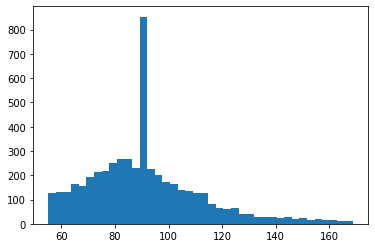

In [588]:
plt.hist(df['avg_glucose_level'],bins=40) # successfully replaced the outliers with median value.
plt.show()

In [589]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)



8.999999999999996


In [590]:
lower_bound_ = Q1 -(1.5 * IQR) 
upper_bound_ = Q3 +(1.5 * IQR) 

In [591]:
df['bmi'].quantile(0.50)

28.4

In [592]:
print(lower_bound_)
print(upper_bound_)

10.300000000000006
46.29999999999999


In [593]:
df['bmi']= np.where(df['bmi']>46,28,df['bmi']) # replacing outliers with median


In [594]:
df['bmi']= np.where(df['bmi']<10,28,df['bmi']) # replacing outliers with median.



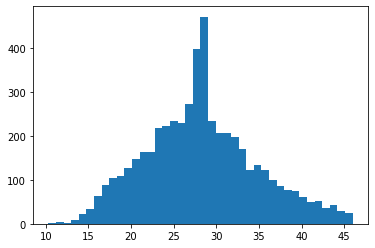

In [595]:
plt.hist(df['bmi'],bins=40)  #  replaced outliers with median.
plt.show()

In [596]:
# I will drop id column bcause I don't think it has any impact in target variabler.
drop_var = ['id']
df.drop(drop_var,axis=1,inplace=True)

In [597]:
df.head(3) # Sucessfully droped the variable.

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,91.00,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,91.00,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1


In [598]:
# handle the categorical columns or variable.
col1 = ['gender','ever_married','work_type','Residence_type','smoking_status']
df = pd.get_dummies(df,columns=col1,drop_first=True)

In [599]:
df.head(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,91.0,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,91.0,28.893237,1,0,0,1,0,0,1,0,0,0,1,0


In [600]:
x = df.drop('stroke',axis=1)  ## Independent and dependent features
y = df.stroke

In [601]:
stroke=df[df['stroke']==1]
non_stroke=df[df['stroke']==0]

In [602]:
print(stroke.shape,non_stroke.shape) # since its an imbalance dataset.

(249, 17) (4861, 17)


(9722, 16)


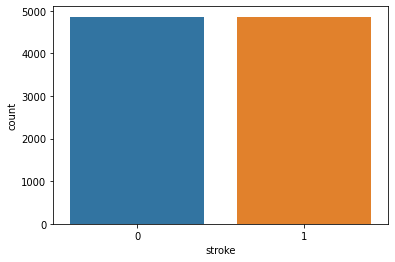

In [603]:
from imblearn.over_sampling import SMOTE
#SMOTE is an oversampling technique that generates synthetic samples
#from the dataset which increases the predictive power for minority classes.

smote = SMOTE() 

# call the smote module only on the training sample
x_smote, y_smote = smote.fit_resample(x, y)

print(x_smote.shape)

sns.countplot(y_smote)#plotting to see the data distribution of the target after using SMOTE
plt.show()

In [604]:
df.corrwith(df['stroke']) # Checking for correlation 

age                               0.245257
hypertension                      0.127904
heart_disease                     0.134914
avg_glucose_level                 0.001617
bmi                               0.058229
stroke                            1.000000
gender_Male                       0.009117
gender_Other                     -0.003166
ever_married_Yes                  0.108340
work_type_Never_worked           -0.014882
work_type_Private                 0.011888
work_type_Self-employed           0.062168
work_type_children               -0.083869
Residence_type_Urban              0.015458
smoking_status_formerly smoked    0.064556
smoking_status_never smoked      -0.004129
smoking_status_smokes             0.008939
dtype: float64

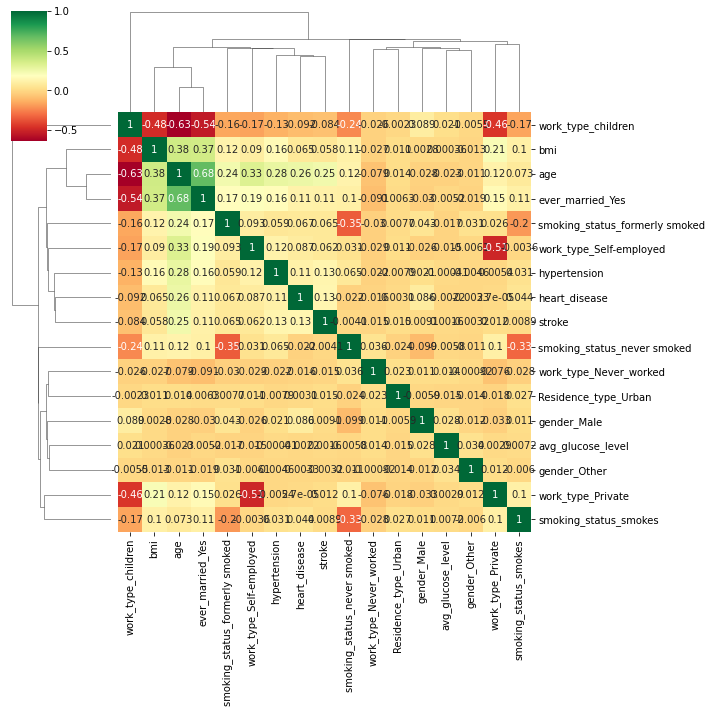

In [605]:
corr_matrix=df.corr()
sns.clustermap(corr_matrix,annot=True,cmap='RdYlGn')
plt.show()

In [606]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x_smote,y_smote)

ExtraTreesClassifier()

In [607]:
print(model.feature_importances_)

[3.46729121e-01 1.59486866e-02 1.43004473e-02 1.26343665e-01
 1.19964660e-01 3.52759644e-02 5.04850024e-06 2.90199908e-02
 9.11034769e-04 4.83502563e-02 4.19058250e-02 3.98491761e-02
 3.45665015e-02 4.20351461e-02 6.04218503e-02 4.43726253e-02]


<AxesSubplot:>

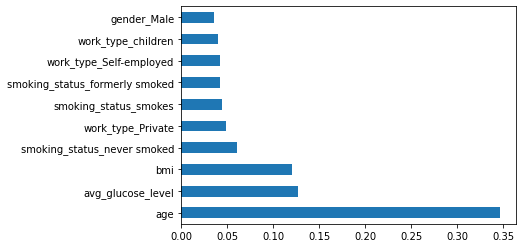

In [608]:
#lets visualize it for better understanding
feat_importances = pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [609]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

In [610]:
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,train_size=0.70,random_state=2)

In [611]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)



LogisticRegression()

In [612]:
y_pred=logreg.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


0.8591018169352074
[[1254  212]
 [ 199 1252]]


In [613]:
from sklearn.ensemble import RandomForestClassifier
reg_rf = RandomForestClassifier()
reg_rf.fit(x_train, y_train)

RandomForestClassifier()

In [614]:
y_pred = reg_rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9410353102502571
[[1367   99]
 [  73 1378]]
